# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
weather_api_key = "007b16e5deba3a8bcc02bfc282b44027"
city_name = []
longs = []
lats = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

for city in cities:
    #query_url = f'api.openweathermap.org/data/2.5/weather?q=\{{city}\}&appid=\{{weather_api_key}\}'
    try: 
        query_url = 'http://api.openweathermap.org/data/2.5/weather?q=' + city + '&appid=' + weather_api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #print(f"The weather API responded with: {weather_json}.\n")
        city_name.append(weather_json['name'])
        longs.append(weather_json['coord']['lon'])
        lats.append(weather_json['coord']['lat'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_spd.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
    
    except:
        print("City not found. Skipping...")
        
        


City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,289.80,77,84,7.29,MX,1612410958
1,Ushuaia,-54.8000,-68.3000,282.15,87,75,3.09,AR,1612410934
2,Opuwo,-18.0607,13.8400,293.19,41,76,1.60,NA,1612410958
3,Lüderitz,-26.6481,15.1594,291.31,70,0,6.10,NA,1612410800
4,Busselton,-33.6500,115.3333,295.93,42,0,1.34,AU,1612410832


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
weather_df = pd.DataFrame({'City': city_name, 'Lat':lats, 'Lng': longs, 
                           'Max Temp':max_temp, 'Humidity':humidity, 
                           'Cloudiness':cloudiness, 'Wind Speed':wind_spd, 
                           'Country':country, 'Date':date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,289.80,77,84,7.29,MX,1612410958
1,Ushuaia,-54.8000,-68.3000,282.15,87,75,3.09,AR,1612410934
2,Opuwo,-18.0607,13.8400,293.19,41,76,1.60,NA,1612410958
3,Lüderitz,-26.6481,15.1594,291.31,70,0,6.10,NA,1612410800
4,Busselton,-33.6500,115.3333,295.93,42,0,1.34,AU,1612410832


In [109]:
weather_df.to_csv('../output_data/weather_data.csv')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [61]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,20.838695,23.785620,282.412247,72.926244,47.912521,3.710223,1.612411e+09
std,33.242107,91.601915,17.805633,19.230552,39.707317,2.801587,8.635643e+01
min,-54.800000,-175.200000,231.100000,16.000000,0.000000,0.120000,1.612410e+09
25%,-6.238650,-58.110250,272.150000,62.500000,1.000000,1.680000,1.612411e+09
50%,28.658500,29.079100,287.150000,77.000000,40.000000,3.090000,1.612411e+09
75%,47.956650,109.158600,297.150000,87.500000,90.000000,5.125000,1.612411e+09
max,78.218600,178.416700,311.150000,100.000000,100.000000,15.430000,1.612411e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
clean_city = weather_df[weather_df['Humidity'] < 100]
clean_city.sort_values('Humidity', ascending =False).head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
151,Pinawa,50.1489,-95.8811,268.37,98,100,1.81,CA,1612410975
131,Maracaçumé,-2.0428,-45.9592,295.42,98,35,1.22,BR,1612410973
256,Sarny,51.3380,26.6019,276.20,98,100,5.95,UA,1612410988
474,Abramovka,51.1886,41.0202,274.37,98,100,3.52,RU,1612411017
390,Atbasar,51.8000,68.3333,267.90,98,100,3.24,KZ,1612410721


In [106]:
# Get the indices of the cities that have humidity over 100%
clean_city = weather_df[weather_df['Humidity'] > 100]
clean_city.index
weather_df['Humidity'].sort_values(ascending = False)

548    100
501    100
352    100
350    100
183    100
      ... 
343     21
333     21
33      21
364     19
268     16
Name: Humidity, Length: 583, dtype: int64

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

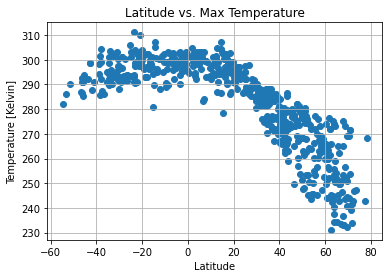

In [66]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'])
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature [Kelvin]')
plt.grid(True)

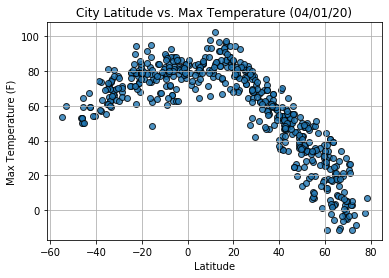

## Latitude vs. Humidity Plot

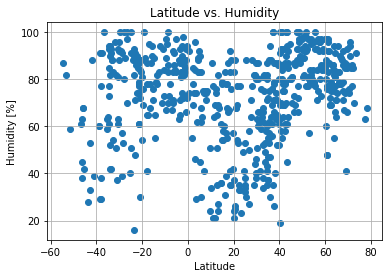

In [68]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'])
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity [%]')
plt.grid(True)

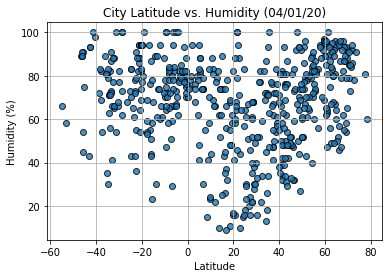

## Latitude vs. Cloudiness Plot

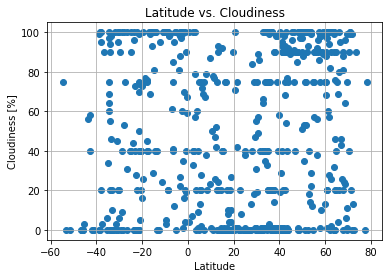

In [70]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'])
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness [%]')
plt.grid(True)

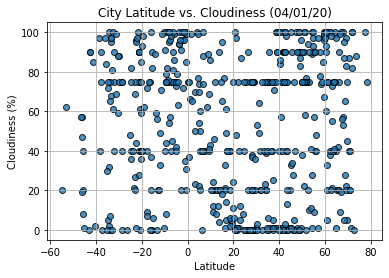

## Latitude vs. Wind Speed Plot

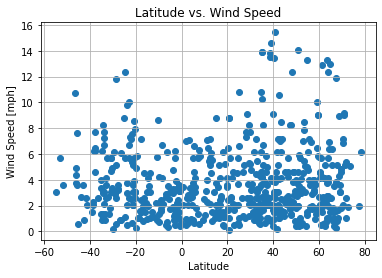

In [71]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'])
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed [mph]')
plt.grid(True)

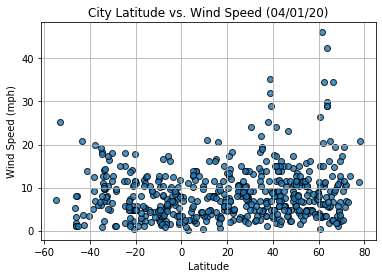

## Linear Regression

In [84]:
north_hem = weather_df['Lat'][weather_df['Lat'] > 0]
south_hem = weather_df['Lat'][weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression equation is y = -0.8*x + 307.83


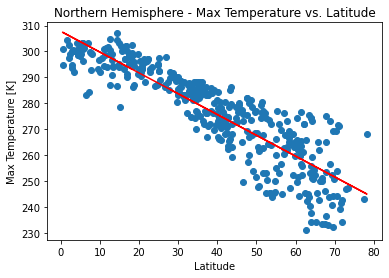

In [82]:
north_temp = weather_df['Max Temp'][weather_df['Lat'] > 0]
plt.scatter(north_hem, north_temp)
plt.title('Northern Hemisphere - Max Temperature vs. Latitude')
plt.ylabel('Max Temperature [K]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(north_hem, north_temp)
plt.plot(north_hem, intercept + north_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()


The r-value is: 0.46937863826630627


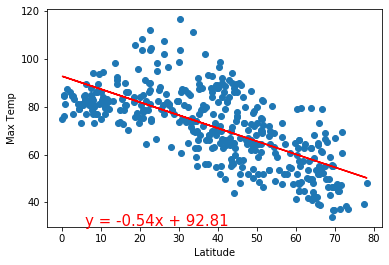

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The regression equation is y = 0.16*x + 300.3


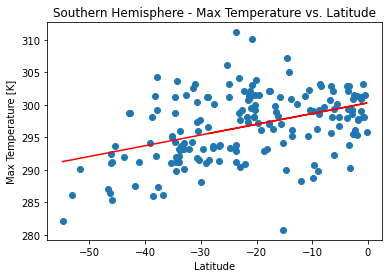

In [83]:
south_temp = weather_df['Max Temp'][weather_df['Lat'] < 0]
plt.scatter(south_hem, south_temp)
plt.title('Southern Hemisphere - Max Temperature vs. Latitude')
plt.ylabel('Max Temperature [K]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(south_hem, south_temp)
plt.plot(south_hem, intercept + south_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.6082708688906918


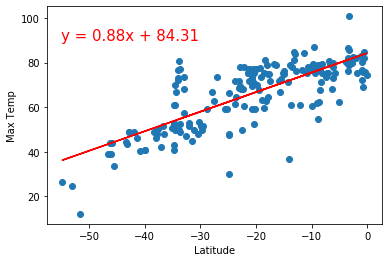

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression equation is y = 0.43*x + 54.83


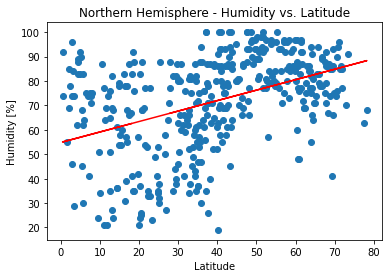

In [85]:
north_hum = weather_df['Humidity'][weather_df['Lat'] > 0]
plt.scatter(north_hem, north_hum)
plt.title('Northern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity [%]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(north_hem, north_hum)
plt.plot(north_hem, intercept + north_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.000543987878808455


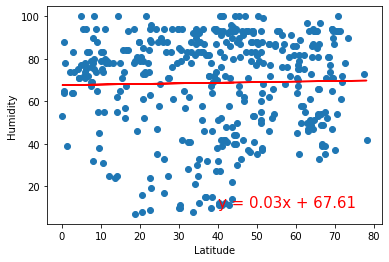

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The regression equation is y = 0.44*x + 85.29


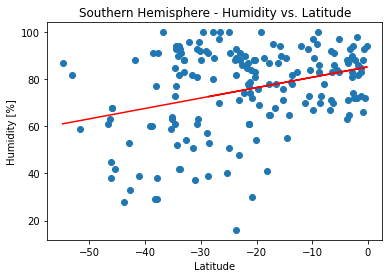

In [87]:
south_hum = weather_df['Humidity'][weather_df['Lat'] < 0]
plt.scatter(south_hem, south_hum)
plt.title('Southern Hemisphere - Humidity vs. Latitude')
plt.ylabel('Humidity [%]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(south_hem, south_hum)
plt.plot(south_hem, intercept + south_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.014985174297345524


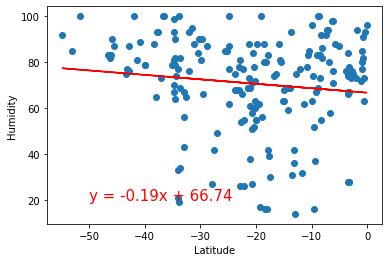

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression equation is y = 0.63*x + 21.19


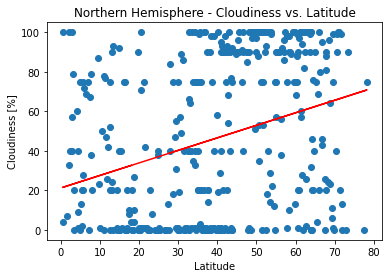

In [88]:
north_cloud = weather_df['Cloudiness'][weather_df['Lat'] > 0]
plt.scatter(north_hem, north_cloud)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness [%]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(north_hem, north_cloud)
plt.plot(north_hem, intercept + north_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.0020898727664228514


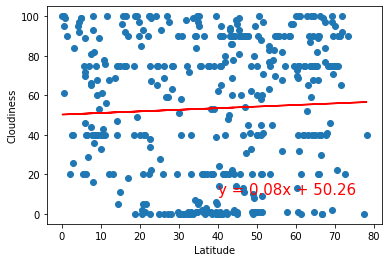

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The regression equation is y = 0.88*x + 70.99


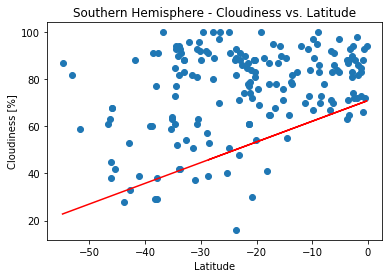

In [89]:
south_cloud = weather_df['Cloudiness'][weather_df['Lat'] < 0]
plt.scatter(south_hem, south_hum)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.ylabel('Cloudiness [%]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(south_hem, south_cloud)
plt.plot(south_hem, intercept + south_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.0035263772085582894


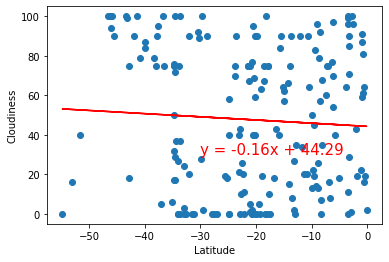

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression equation is y = 0.01*x + 3.25


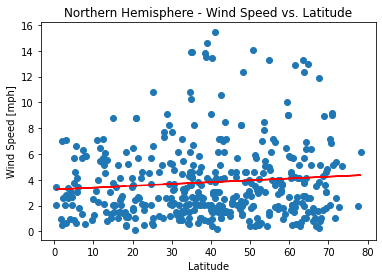

In [90]:
north_speed = weather_df['Wind Speed'][weather_df['Lat'] > 0]
plt.scatter(north_hem, north_speed)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed [mph]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(north_hem, north_speed)
plt.plot(north_hem, intercept + north_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.04019723576144484


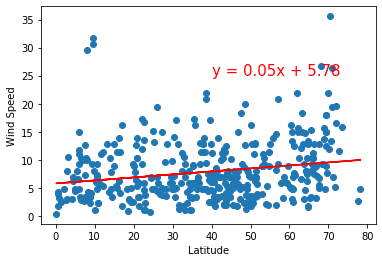

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The regression equation is y = -0.04*x + 2.51


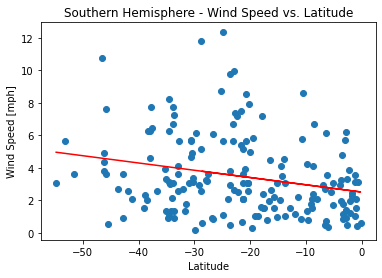

In [91]:
south_speed = weather_df['Wind Speed'][weather_df['Lat'] < 0]
plt.scatter(south_hem, south_speed)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.ylabel('Wind Speed [mph]')
plt.xlabel('Latitude')

slope, intercept, r_value, p_value, std_err = linregress(south_hem, south_speed)
plt.plot(south_hem, intercept + south_hem*slope, color='r')
print(f'The regression equation is y = {round(slope,2)}*x + {round(intercept,2)}')
plt.show()

The r-value is: 0.017128274759839232


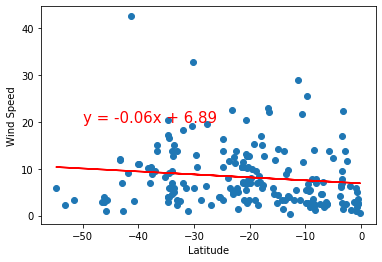